<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-4'

In [5]:
os.listdir(base_path)

['data_add_delta_-4_n250.csv',
 'data_add_delta_-4_n120.csv',
 'data_add_delta_-4_n60.csv',
 'data_add_delta_-4_n30.csv',
 'data_add_delta_-4_n20.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.189801,75.092578,41.077007,-0.000135,199.359251,199.359395,-0.000145
1,0.0,1.0,86.527001,51.672083,75.656823,0.000052,223.855959,223.855922,0.000037
2,0.0,2.0,78.702950,29.733054,57.447595,-0.002263,175.881336,175.883681,-0.002345
3,0.0,3.0,36.026108,43.767887,23.702221,-0.000029,113.496186,113.496349,-0.000163
4,0.0,4.0,30.132667,51.054562,76.877885,0.000132,168.065246,168.065205,0.000041
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,94.346602,77.500966,21.159388,-0.000176,203.006780,203.006879,-0.000099
249996,999.0,246.0,89.803533,46.001564,89.412876,-0.000295,235.217679,235.217840,-0.000161
249997,999.0,247.0,77.315993,56.194500,34.467630,0.000104,177.978226,177.978065,0.000162
249998,999.0,248.0,99.632091,81.349368,30.222691,-0.000055,221.204096,221.204055,0.000040


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.189801,75.092578,41.077007,-0.000135,199.359251,199.359395,-0.000145
1,0.0,1.0,86.527001,51.672083,75.656823,0.000052,223.855959,223.855922,0.000037
2,0.0,2.0,78.702950,29.733054,57.447595,-0.002263,175.881336,175.883681,-0.002345
3,0.0,3.0,36.026108,43.767887,23.702221,-0.000029,113.496186,113.496349,-0.000163
4,0.0,4.0,30.132667,51.054562,76.877885,0.000132,168.065246,168.065205,0.000041
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,94.346602,77.500966,21.159388,-0.000176,203.006780,203.006879,-0.000099
249996,999.0,246.0,89.803533,46.001564,89.412876,-0.000295,235.217679,235.217840,-0.000161
249997,999.0,247.0,77.315993,56.194500,34.467630,0.000104,177.978226,177.978065,0.000162
249998,999.0,248.0,99.632091,81.349368,30.222691,-0.000055,221.204096,221.204055,0.000040


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.189801  75.092578  41.077007 -0.000135  199.359251   
      1.0    86.527001  51.672083  75.656823  0.000052  223.855959   
      2.0    78.702950  29.733054  57.447595 -0.002263  175.881336   
      3.0    36.026108  43.767887  23.702221 -0.000029  113.496186   
      4.0    30.132667  51.054562  76.877885  0.000132  168.065246   
...                ...        ...        ...       ...         ...   
999.0 245.0  94.346602  77.500966  21.159388 -0.000176  203.006780   
      246.0  89.803533  46.001564  89.412876 -0.000295  235.217679   
      247.0  77.315993  56.194500  34.467630  0.000104  177.978226   
      248.0  99.632091  81.349368  30.222691 -0.000055  221.204096   
      249.0  62.732719  45.022952  38.522189 -0.000458  156.277402   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    199.359395 -0.000145  
      1.0    223.855922  0.000037  
      2.0    175.883681 -0.002345  
      3.0    113.496349 -0.000163  
      4.0    168.065205  0.000041  
...                 ...       ...  
999.0 245.0  203.006879 -0.000099  
      246.0  235.217840 -0.000161  
      247.0  177.978065  0.000162  
      248.0  221.204055  0.000040  
      249.0  156.277829 -0.000427  

[250000 rows x 7 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.189801  75.092578  41.077007 -0.000135  199.359251   
      1.0    86.527001  51.672083  75.656823  0.000052  223.855959   
      2.0    78.702950  29.733054  57.447595 -0.002263  175.881336   
      3.0    36.026108  43.767887  23.702221 -0.000029  113.496186   
      4.0    30.132667  51.054562  76.877885  0.000132  168.065246   
...                ...        ...        ...       ...         ...   
999.0 245.0  94.346602  77.500966  21.159388 -0.000176  203.006780   
      246.0  89.803533  46.001564  89.412876 -0.000295  235.217679   
      247.0  77.315993  56.194500  34.467630  0.000104  177.978226   
      248.0  99.632091  81.349368  30.222691 -0.000055  221.204096   
      249.0  62.732719  45.022952  38.522189 -0.000458  156.277402   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    199.359395 -0.000145  
      1.0    223.855922  0.000037  
      2.0    175.883681 -0.002345  
      3.0    113.496349 -0.000163  
      4.0    168.065205  0.000041  
...                 ...       ...  
999.0 245.0  203.006879 -0.000099  
      246.0  235.217840 -0.000161  
      247.0  177.978065  0.000162  
      248.0  221.204055  0.000040  
      249.0  156.277829 -0.000427  

[250000 rows x 7 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.189801,75.092578,41.077007,-0.000135,199.359251,199.359395,-0.000145
1,0.0,1.0,86.527001,51.672083,75.656823,0.000052,223.855959,223.855922,0.000037
2,0.0,2.0,78.702950,29.733054,57.447595,-0.002263,175.881336,175.883681,-0.002345
3,0.0,3.0,36.026108,43.767887,23.702221,-0.000029,113.496186,113.496349,-0.000163
4,0.0,4.0,30.132667,51.054562,76.877885,0.000132,168.065246,168.065205,0.000041
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,94.346602,77.500966,21.159388,-0.000176,203.006780,203.006879,-0.000099
249996,999.0,246.0,89.803533,46.001564,89.412876,-0.000295,235.217679,235.217840,-0.000161
249997,999.0,247.0,77.315993,56.194500,34.467630,0.000104,177.978226,177.978065,0.000162
249998,999.0,248.0,99.632091,81.349368,30.222691,-0.000055,221.204096,221.204055,0.000040


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.189801  75.092578  41.077007 -0.000135  199.359251   
      1.0    86.527001  51.672083  75.656823  0.000052  223.855959   
      2.0    78.702950  29.733054  57.447595 -0.002263  175.881336   
      3.0    36.026108  43.767887  23.702221 -0.000029  113.496186   
      4.0    30.132667  51.054562  76.877885  0.000132  168.065246   
...                ...        ...        ...       ...         ...   
999.0 245.0  94.346602  77.500966  21.159388 -0.000176  203.006780   
      246.0  89.803533  46.001564  89.412876 -0.000295  235.217679   
      247.0  77.315993  56.194500  34.467630  0.000104  177.978226   
      248.0  99.632091  81.349368  30.222691 -0.000055  221.204096   
      249.0  62.732719  45.022952  38.522189 -0.000458  156.277402   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    199.359395 -0.000145  
      1.0    223.855922  0.000037  
      2.0    175.883681 -0.002345  
      3.0    113.496349 -0.000163  
      4.0    168.065205  0.000041  
...                 ...       ...  
999.0 245.0  203.006879 -0.000099  
      246.0  235.217840 -0.000161  
      247.0  177.978065  0.000162  
      248.0  221.204055  0.000040  
      249.0  156.277829 -0.000427  

[250000 rows x 7 columns]

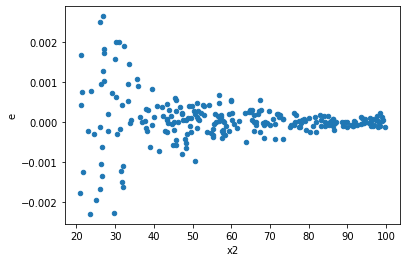

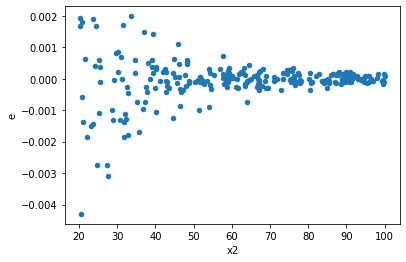

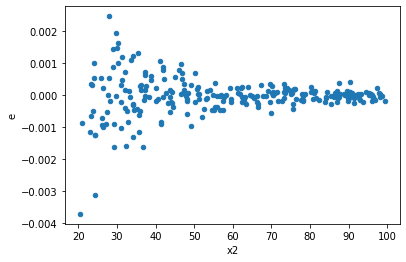

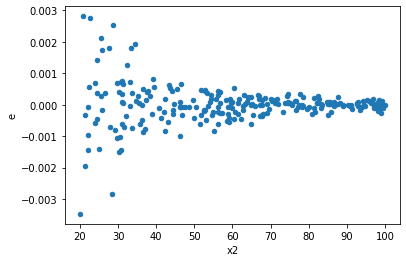

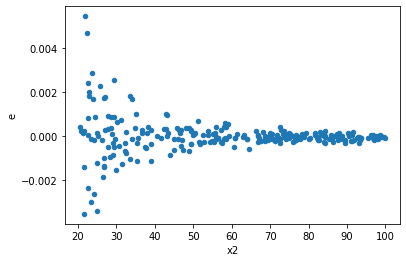

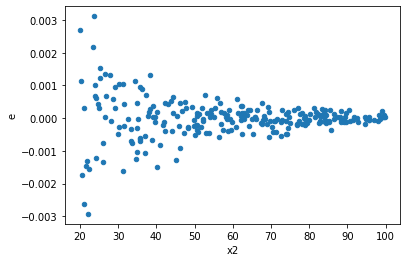

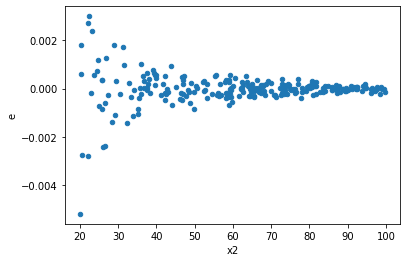

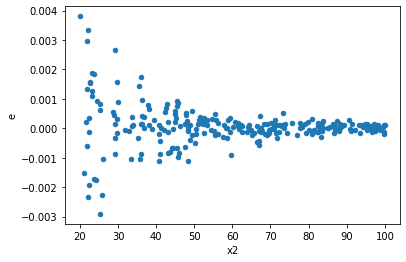

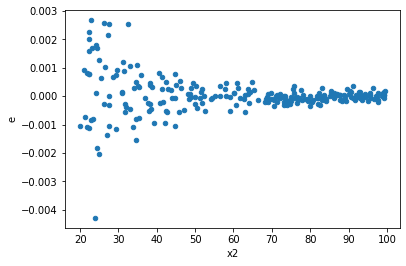

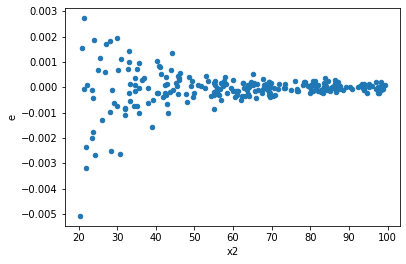

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
818.0,97.0,97.0,3.1360116518864535e-05,4.783047869634342e-05,3.2330017029757255e-07,4.930977185190044e-07,1.5252009241601898,0.038849389919148436,0.9805753050404258,0.019424694959574218,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,7.096891397458594e-05,9.716976839562999e-06,7.316382883977932e-07,1.00175018964567e-07,0.13691877605796055,8.640796828178821e-20,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,5.925109484292888e-05,3.834509613324108e-05,6.108360293085452e-07,3.9531026941485644e-07,0.6471626597768638,0.03324887213058492,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,5.966240367915032e-05,1.2494486809090857e-05,6.150763265891786e-07,1.288091423617614e-07,0.20941976921149744,2.2164666300388043e-13,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,6.50789503270915e-05,1.4840418325324849e-05,6.709170136813557e-07,1.529940033538644e-07,0.22803714950434562,3.252649974128631e-12,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,0.00012233985535448037,1.4964825891051189e-05,1.261235622211138e-06,1.542765555778473e-07,0.12232175563466645,1.2414413634322966e-21,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,6.123194307676343e-05,9.138242550776401e-06,6.312571451212725e-07,9.420868609047836e-08,0.14923979366978835,2.032226692407175e-18,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,8.786556656452869e-05,8.486068308301396e-06,9.05830583139471e-07,8.748524029176697e-08,0.09658013531465943,1.1819114441093557e-25,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,7.795297157712184e-05,2.5947061758747277e-05,8.036388822383695e-07,2.67495482048941e-07,0.332855325894496,1.321529874566071e-07,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,8.834046108193957e-05,1.2066504343106072e-05,9.107264029065935e-07,1.2439695199078424e-07,0.136590914234802,7.905429827319144e-20,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    994
Reject005=1 : Homoscedasticity        6
Name: Result_test, dtype: int64